In [413]:
import pandas as pd

In [414]:
dataSet = pd.read_csv("Alzheimer.csv")
dataSet.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
1,51676,Bachelor,61.0,0,0,Yes,Freelance,High,202.21,NaN,never smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1


# MARK: Data Processing

In [415]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HN              4100 non-null   int64  
 1   Education       4100 non-null   object 
 2   age             4100 non-null   float64
 3   hypertension    4100 non-null   int64  
 4   heart_disease   4100 non-null   int64  
 5   family history  4100 non-null   object 
 6   Occupation      4100 non-null   object 
 7   Triglycerides   4100 non-null   object 
 8   Blood Sugar     4100 non-null   float64
 9   BMI             3936 non-null   float64
 10  smoking_status  4100 non-null   object 
 11  alzheimer       4100 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 384.5+ KB


In [416]:
dataSet.isna().sum()

HN                  0
Education           0
age                 0
hypertension        0
heart_disease       0
family history      0
Occupation          0
Triglycerides       0
Blood Sugar         0
BMI               164
smoking_status      0
alzheimer           0
dtype: int64

### MARK: เลือกที่จะ drop ทิ้งเพราะว่า Null มีจำนวนไม่เยอะมาก ไม่มีผลต่อ data เท่าที่ควร และ ไม่สามารถหาค่า BMI มาแทนที่ได้เพราะไม่มี weight และ height ของผู้ป่วย

In [417]:
dataSet = dataSet.dropna()
dataSet.isna().sum()

HN                0
Education         0
age               0
hypertension      0
heart_disease     0
family history    0
Occupation        0
Triglycerides     0
Blood Sugar       0
BMI               0
smoking_status    0
alzheimer         0
dtype: int64

### ตรวจสอบ Class Target จำนวนเหมาะสมกันหรือไม่

In [418]:
print("Target == 1 ->", len(dataSet.loc[dataSet["alzheimer"] == 1, "alzheimer"]))

Target == 1 -> 202


In [419]:
print("Target == 1 ->", len(dataSet.loc[dataSet["alzheimer"] == 0, "alzheimer"]))

Target == 1 -> 3734


### ปรับข้อมูล เป็น 0,1

In [420]:
dataSet.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1
5,66889,Secondary School,81.0,0,0,Yes,Private,Normal,186.21,29.0,formerly smoked,1


In [421]:
dataSet['Education'].unique()

array(['Secondary School', 'Bachelor'], dtype=object)

In [422]:
dataSet["Education"] = dataSet["Education"].replace({'Bachelor': 1, 'Secondary School': 0})

In [423]:
dataSet['family history'].unique()

array(['Yes', 'No'], dtype=object)

In [424]:
dataSet["family history"] = dataSet["family history"].replace({'Yes': 1, 'No': 0})

In [425]:
dataSet['Occupation'].unique()

array(['Private', 'Freelance', 'Officer', 'Farmer', 'Never_worked'],
      dtype=object)

In [426]:
dataSet["Occupation"] = dataSet["Occupation"].replace({'Private': 0, 'Freelance': 1, "Officer":2, "Farmer":3, "Never_worked":4})

In [427]:
dataSet['Triglycerides'].unique()

array(['Normal', 'High'], dtype=object)

In [428]:
dataSet['Triglycerides'] = dataSet['Triglycerides'].replace({'High': 1,'Normal': 0})

In [429]:
dataSet["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [430]:
dataSet["smoking_status"] = dataSet["smoking_status"].replace({'formerly smoked': 0, 'never smoked': 1, "smokes":2, "Unknown":3})

# Feature Select ค่อยกลับมาทำ

In [431]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

In [432]:
# X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [433]:
# print("คุณลักษณะที่ถูกเลือก:")
# print(X_new[:5])  # แสดง 5 ตัวอย่างแรก

In [434]:
# print("\nคุณลักษณะเดิม:")
# print(X[:5])  # แสดง 5 ตัวอย่างแรก

# Model 1 Decision tree

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import plot_tree

#### train_test_split

In [436]:
X = dataSet.loc[:, "HN":"smoking_status"]
y = dataSet["alzheimer"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# random_state 42 เพื่อข้อมูลเหมือนกันทุกครั้ง

In [437]:
# #ลอง
# split_at = int((len(dataSet.loc[dataSet["alzheimer"] == 1, "alzheimer"])-1)*2) 
# X_train, X_test, y_train, y_test = X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [438]:
X_train.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status
2837,22939,1,22.0,0,0,0,0,1,80.72,29.3,3
2069,464,0,46.0,0,0,1,0,1,78.44,23.9,1
1724,21724,1,42.0,0,0,1,1,0,124.34,34.7,0
1826,2868,1,54.0,0,0,1,2,1,102.61,32.4,3
514,42359,0,9.0,0,0,0,3,0,122.22,17.7,3


In [439]:
y_train

2837    0
2069    0
1724    0
1826    0
514     0
       ..
1195    0
1368    0
914     0
3661    0
3323    0
Name: alzheimer, Length: 2755, dtype: int64

#### model Start

In [440]:
clfModel = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced')

In [441]:
clfModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [442]:
# feature ที่มีความสำคัญ
fImportances = pd.Series(clfModel.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fImportances

age               0.438133
HN                0.207721
Blood Sugar       0.159457
BMI               0.108921
smoking_status    0.032619
Education         0.013869
hypertension      0.011458
Occupation        0.008413
Triglycerides     0.008122
family history    0.006357
heart_disease     0.004931
dtype: float64

In [443]:
clfModel.score(X_train,y_train)
# อันเดียวกัน
# y_train_pred = clf.predict(X_train)
# accuracy_score(y_train, y_train_pred)

1.0

### Visualize Decision Tree

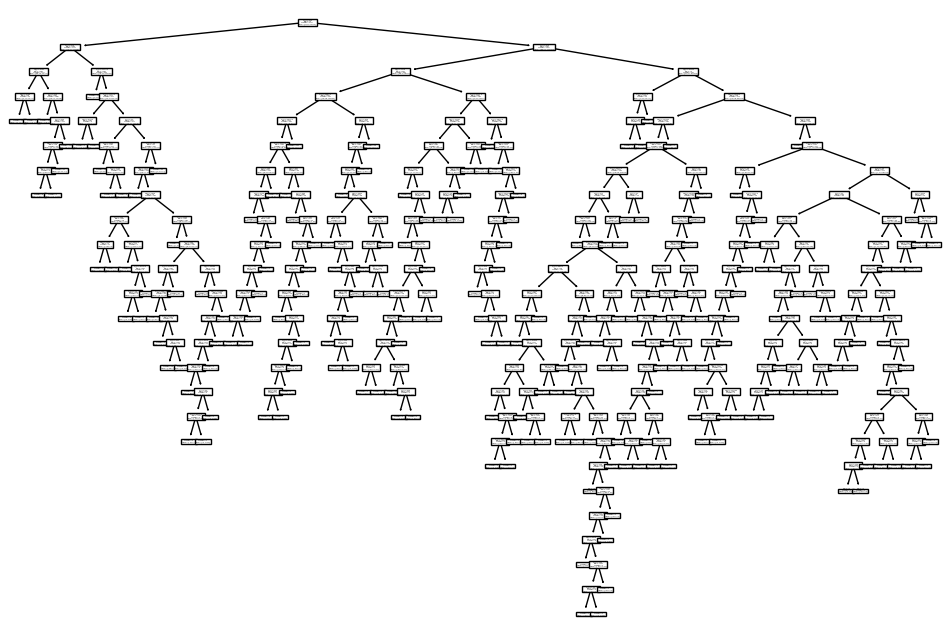

In [444]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf.fit(X_train, y_train))
plt.show()

### Predict and Score Model

In [445]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9127857747671465

In [446]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alzheimer,,
0,1065,49
1,54,13


In [447]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1114
           1       0.21      0.19      0.20        67

    accuracy                           0.91      1181
   macro avg       0.58      0.58      0.58      1181
weighted avg       0.91      0.91      0.91      1181

